In [11]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

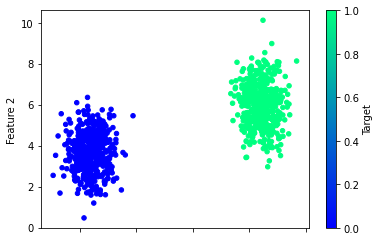

In [12]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [13]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [16]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [17]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [18]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.5707
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5973
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.6267
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6920
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.7320
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.7707
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.8067
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.8520
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

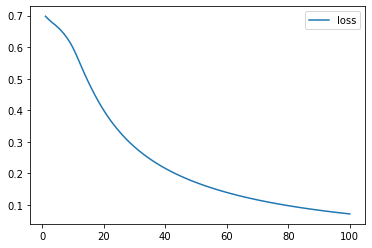

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

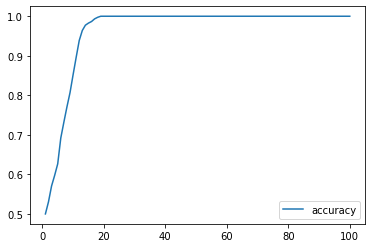

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0670 - accuracy: 1.0000 - 260ms/epoch - 33ms/step
Loss: 0.06703030318021774, Accuracy: 1.0


In [24]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

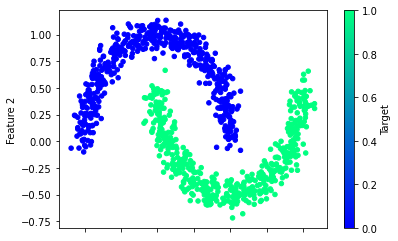

In [25]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [26]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [27]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7691 - accuracy: 0.6253
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.6520
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.6733
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.6920
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7067
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7200
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7293
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4572 - accuracy: 0.7440
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4416 - accuracy: 0.7507
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.7707
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2590 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2588 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2585 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2583 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2576 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2573 - accuracy: 0.8920


<AxesSubplot:>

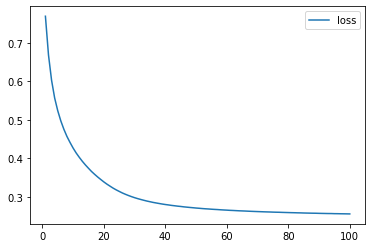

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

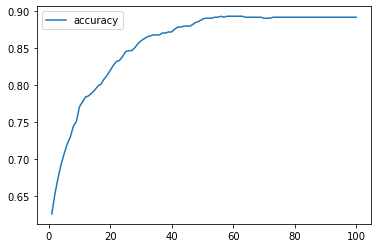

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [30]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [31]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.7857 - accuracy: 0.4627
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7426 - accuracy: 0.5013
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.5413
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.5920
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.7053
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.7733
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.8107
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.8467
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.8613
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.8707
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9133
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9147
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9147
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9147
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9147
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9147
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.9147
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9147
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9147
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9160
Epoch 93/100
